# Scholar Data Analysis

In [1]:
# importing necessary libraries
import pandas as pd
import mysql.connector # to connect to MySQL DB 
from sqlalchemy import create_engine # to create db connection engine
import matplotlib.pyplot as plt
from ipywidgets import interact # to create interactive graphs


In [52]:
# To enable juypter to display interactive figures
# %matplotlib widget  

In [2]:
# create an engine for connection
hostname= "localhost"
database= "google_scholar_db"
username= "root"
password= ""

scholar_db = create_engine("mysql://{user}:{pw}@{host}/{db}".format(host=hostname, db=database, user=username, pw=password))


In [3]:
data = scholar_db.execute ( """ SELECT name, id, citation FROM Scholars 
                              ORDER BY citation DESC
                              LIMIT 20
                             """).fetchall()

data_df = pd.DataFrame(data)
data_df


,name,id,citation
0,Geoffrey Hinton,JicYPdAAAAAJ,794574
1,Yoshua Bengio,kukA0LcAAAAJ,773974
2,Kaiming He,DhtAFkwAAAAJ,557407
3,Jian Sun,ALVSZAYAAAAJ,494820
4,Ilya Sutskever,x04W_mMAAAAJ,494135
5,Ross Girshick,W8VIEZgAAAAJ,455887
6,Andrew Zisserman,UZ5wscMAAAAJ,408202
7,Valentin Fuster,cn1lDPMAAAAJ,379249
8,Peter Tugwell,80_lcqkAAAAJ,359167
9,Shaoqing Ren,AUhj438AAAAJ,350259


## Analysis Graphs

In [4]:
# Count of Publications per Year:
data = scholar_db.execute('''
                                    SELECT year, COUNT(*) AS publication_count
                                    FROM publications
                                    GROUP BY year
                                    ORDER BY year;    
                                ''').fetchall()
pub_by_year = pd.DataFrame(data)

In [5]:
pub_by_year.head()

,year,publication_count
0,NaN,48087
1,2.0,1
2,3.0,1
3,6.0,3
4,7.0,2


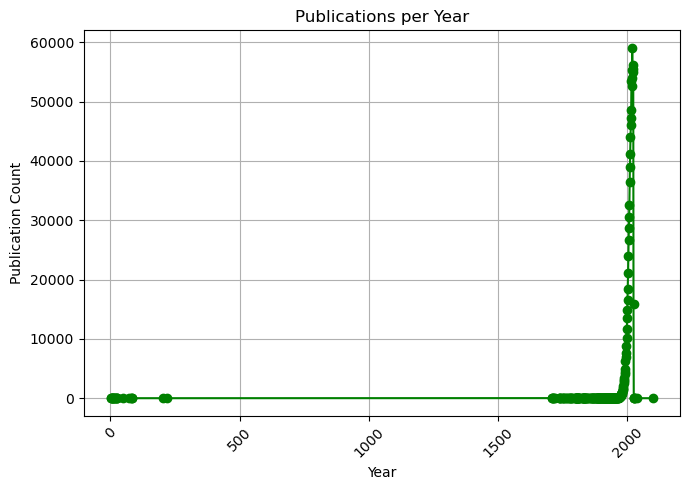

In [6]:
# Plotting a line chart of publications per year
plt.figure(figsize=(7, 5))
plt.plot(pub_by_year["year"], pub_by_year["publication_count"], marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Publication Count')
plt.title('Publications per Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

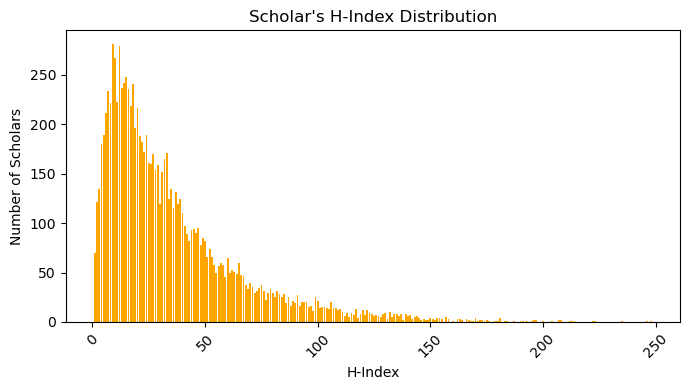

In [7]:
#  Scholar's H-Index Distribution:
h_index_dist = pd.DataFrame(scholar_db.execute('''
                                    SELECT h_index, COUNT(*) AS scholar_count
                                    FROM scholars
                                    GROUP BY h_index
                                    ORDER BY h_index;  
                                ''').fetchall() )

# Plotting a histogram of scholar's h-index distribution
plt.figure(figsize=(7, 4))
plt.bar(h_index_dist['h_index'], h_index_dist['scholar_count'], color='orange')
plt.xlabel('H-Index')
plt.ylabel('Number of Scholars')
plt.title('Scholar\'s H-Index Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\moham\AppData\Local\Temp\ipykernel_144\1614433565.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(7, 5))


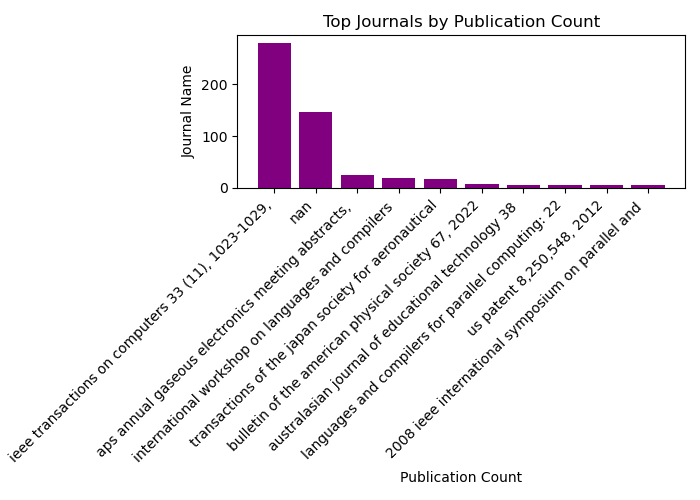

In [58]:
#  Top Journals by Publication Count
top_journals = pd.DataFrame(scholar_db.execute('''
                                    SELECT j.name, COUNT(*) AS publication_count
                                    FROM journals j
                                    JOIN publications p ON j.ID = p.journal_id
                                    GROUP BY j.name
                                    ORDER BY publication_count DESC
                                    LIMIT 10;
                                ''').fetchall())

# Plotting a horizontal bar chart of top journals by publication count
plt.figure(figsize=(7, 5))
plt.bar(top_journals['name'], top_journals['publication_count'], color='purple')
plt.xlabel('Journal Name')
plt.ylabel('Publication Count')
plt.title('Top Journals by Publication Count')
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align to the right
plt.tight_layout()
plt.show()

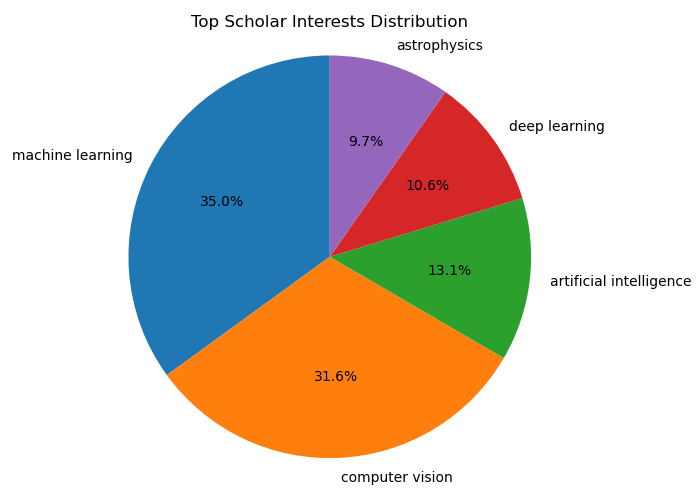

In [59]:
# Scholar Interests Distribution (Top 5)
scholar_interests = pd.DataFrame(scholar_db.execute('''
                                        SELECT r.interest, COUNT(*) AS scholar_count
                                        FROM research_interests r
                                        JOIN interested i ON r.ID = i.interest_id
                                        GROUP BY r.interest
                                        ORDER BY scholar_count DESC
                                        LIMIT 5;
                                ''').fetchall())

# Plotting a pie chart of top scholar interests
plt.figure(figsize=(7, 5))
plt.pie(scholar_interests['scholar_count'], labels=scholar_interests['interest'], autopct='%1.1f%%', startangle=90)
plt.title('Top Scholar Interests Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [11]:
import networkx as nx  # Import networkx library

In [12]:
# Co-author Networks
co_author_networks = pd.DataFrame(scholar_db.execute('''
                                    SELECT name, scholar_id, co_author_id
                                    FROM co_authors JOIN scholars 
                                    ON co_authors.scholar_id = scholars.ID
                                                      LIMIT 5
                                ''').fetchall())

co_author_networks.head()

,name,scholar_id,co_author_id
0,Birgitte Gregersen,-2ddEyUAAAAJ,DoUxlMEAAAAJ
1,Alejandro Uribe-Tirado,-2lv5cwAAAAJ,E_8IRswAAAAJ
2,Alejandro Uribe-Tirado,-2lv5cwAAAAJ,ljBOqIEAAAAJ
3,Alejandro Uribe-Tirado,-2lv5cwAAAAJ,LTyqhDQAAAAJ
4,Alejandro Uribe-Tirado,-2lv5cwAAAAJ,SaCSbeoAAAAJ


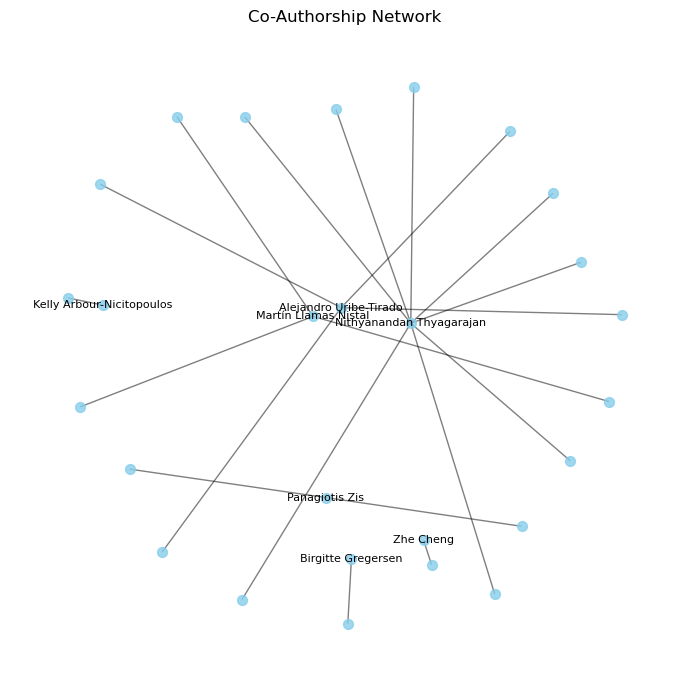

In [14]:
# Assuming scholar_db is your database connection and has been established
# Execute the SQL query to retrieve co-authorship data with scholar names
co_author_networks = pd.DataFrame(scholar_db.execute('''
                                                    SELECT name, scholar_id, co_author_id
                                                    FROM co_authors
                                                    JOIN scholars ON co_authors.scholar_id = scholars.ID
                                                    LIMIT 20;
                                                ''').fetchall())

# Create a directed graph from co-authorship data
G = nx.from_pandas_edgelist(co_author_networks, source='scholar_id', target='co_author_id', create_using=nx.DiGraph)

# Plotting a network graph of co-authorship
plt.figure(figsize=(7, 7))
pos = nx.spring_layout(G, k=0.15)  # Position nodes using spring layout

# Draw nodes with labels (scholar names)
nx.draw_networkx_nodes(G, pos=pos, node_size=50, node_color='skyblue', alpha=0.8)
nx.draw_networkx_edges(G, pos=pos, alpha=0.5, arrows=False)

# Map each node ID to scholar name for labels
labels = {node_id: scholar_name for node_id, scholar_name in zip(co_author_networks['scholar_id'], co_author_networks['name'])}
nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=8, font_color='black', font_family='sans-serif')

plt.title('Co-Authorship Network')
plt.axis('off')  # Turn off axis
plt.tight_layout()
plt.show()

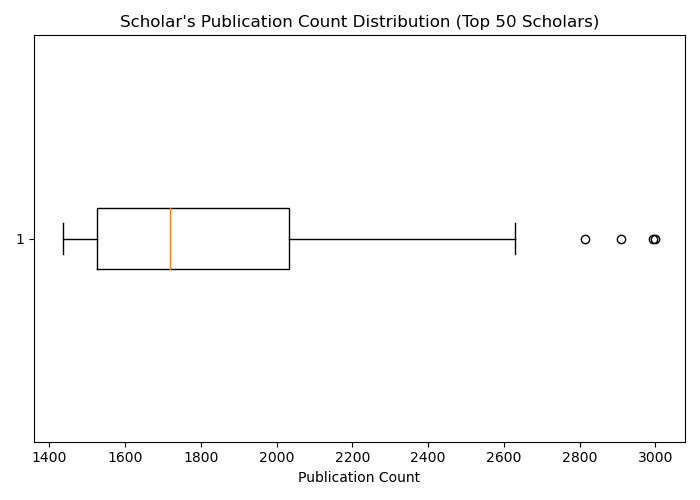

In [68]:
# Scholar's Publication Count (Top 50 scholars)
scholars_pubs = pd.DataFrame(scholar_db.execute('''
                                    SELECT s.name, COUNT(*) AS publication_count
                                    FROM scholars s
                                    JOIN published p ON s.ID = p.author_id
                                    GROUP BY s.name
                                    ORDER BY publication_count DESC
                                    LIMIT 50;
                                ''').fetchall())
# Plotting a box plot of scholar's publication count
plt.figure(figsize=(7, 5))
plt.boxplot(scholars_pubs['publication_count'], vert=False)
plt.xlabel('Publication Count')
plt.title('Scholar\'s Publication Count Distribution (Top 50 Scholars)')
plt.tight_layout()
plt.show()

### Creating Word Graph

Word graph of the research interests

In [16]:
# Import the word cloud to graph the word soup graph
from wordcloud import WordCloud

interests_titles = pd.DataFrame( scholar_db.execute("""
                                                    SELECT interest FROM research_interests
                                                """).fetchall())

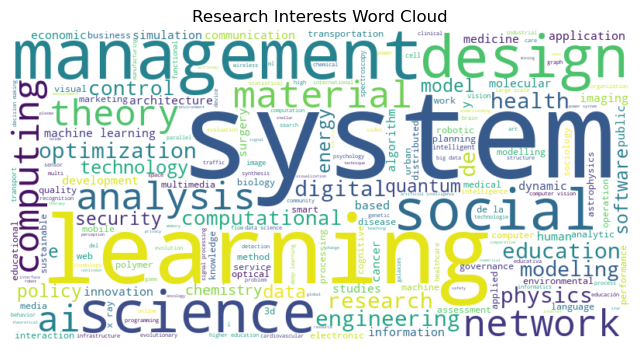

In [19]:
interests = ' '.join(interests_titles['interest'].astype(str))
plt.figure(figsize=(8,6))
wordcloud = WordCloud( width=800, height = 400, background_color="white").generate(interests)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Research Interests Word Cloud")
plt.show()

In [22]:
research_titles = pd.DataFrame( scholar_db.execute("""
                                                    SELECT title FROM publications
                                                """).fetchall())
research_titles

,title
0,Practical multiprocessor scheduling algorithms...
1,Encyclopedia of parallel computing
2,Parallel processing of robot-arm control compu...
3,Genetic dissection of the circuit for hand dex...
4,A standard task graph set for fair evaluation ...
...,...
2002,気液界面大気圧プラズマによる殺菌法と医療応用
2003,細胞膜輸送制御に向けたプラズマ誘起活性種・電位分布計測
2004,高水蒸気圧空気プラズマ活性ガスによる分生子発芽抑制効果
2005,Reactive Species Transfer into Liquid Phase th...


In [24]:

titles = ' '.join(research_titles['title'].astype(str)) # join all titles for the graph condition
titles

'Practical multiprocessor scheduling algorithms for Encyclopedia of parallel computing Parallel processing of robot-arm control computati Genetic dissection of the circuit for hand dexteri A standard task graph set for fair evaluation of m Humanoid robots in waseda university—hadaly-2 and  A multi-grain parallelizing compilation scheme for Method for controlling heterogeneous multiprocesso 並列処理技術 Parallel processing of near fine grain tasks using Automatic coarse grain task parallel processing on Multiprocessor system and multigrain parallelizing Global compiler for controlling heterogeneous mult Fortran プログラム粗粒度タスク間の並列性検出手法 Ieee cs 2022 report A 45nm 37.3 GOPS/W heterogeneous multi-core SoC Multigrain parallel processing on compiler coopera Oscar api for real-time low-power multicores and i An 8640 MIPS SoC with independent power-off contro 共有メモリマルチプロセッサシステム上での粗粒度タスク並列処理 Are Japanese digital natives ready for learning En Virtual reality in the language classroom: Theory  Evaluating a 

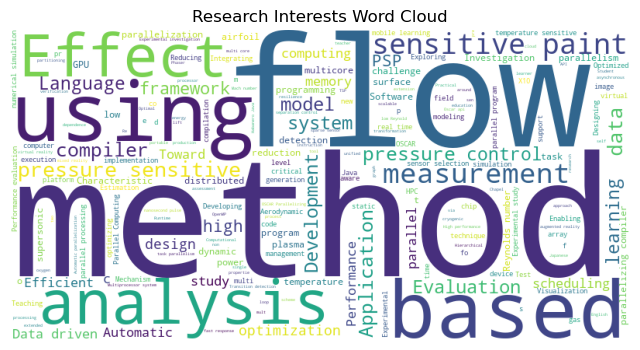

In [27]:

plt.figure(figsize=(8,6))
wordcloud = WordCloud( width=800, height = 400, background_color="white").generate(titles)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Research Interests Word Cloud")
plt.show()